# Assignment 3 Final Code

### importing modules

In [1]:
# importing required modules
import pandas as pd
import numpy as np
from collections import defaultdict

import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth


## Exploratory Data Analysis

In [2]:
#Opening, Reading dataset

trainData = pd.read_csv("Groceries data train.csv")
trainData

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3021,30/01/2015,frankfurter,2015,1,30,4
1,1292,24/10/2015,pork,2015,10,24,5
2,4206,4/04/2014,root vegetables,2014,4,4,4
3,4369,25/08/2015,onions,2015,8,25,1
4,1522,1/07/2014,waffles,2014,7,1,1
...,...,...,...,...,...,...,...
26995,4206,14/01/2014,rolls/buns,2014,1,14,1
26996,1660,15/06/2014,domestic eggs,2014,6,15,6
26997,1595,10/05/2015,liver loaf,2015,5,10,6
26998,3231,31/03/2015,sausage,2015,3,31,1


In [3]:
#Grouping the data by Date
groupTrainData = trainData.groupby(["Member_number", "Date"])["itemDescription"].apply(list)
groupTrainData

Member_number  Date      
1000           15/03/2015                    [sausage, yogurt]
               24/06/2014                             [pastry]
               24/07/2015       [misc. beverages, canned beer]
               25/11/2015                            [sausage]
               27/05/2015           [soda, pickled vegetables]
                                           ...                
4999           26/12/2015               [herbs, bottled water]
               4/09/2014     [newspapers, semi-finished bread]
5000           16/11/2014                   [other vegetables]
               2/10/2015                                [soda]
               3/09/2014       [onions, fruit/vegetable juice]
Name: itemDescription, Length: 13901, dtype: object

In [4]:
print("Information about data")

print("Total number of members : ", len(trainData['Member_number'].unique()))
print("Total number of products : ", len(trainData['itemDescription'].unique()))
print("Total number of transactions : ", len(groupTrainData))

Information about data
Total number of members :  3872
Total number of products :  167
Total number of transactions :  13901


In [5]:
groupTrainData.fillna(0,inplace=True)
transactions = list(groupTrainData.values)


#Transform and prepare data using the external libraries for fpgrowth 
cols = []
for i in transactions:
    for item in i:
        if item not in cols:
            cols.append(item)
cols = sorted(cols)
df = pd.DataFrame(False, columns= cols, index = range(len(transactions)))

for ind in range(len(transactions)):
    for item in transactions[ind]:
        df.loc[ind, item] = True

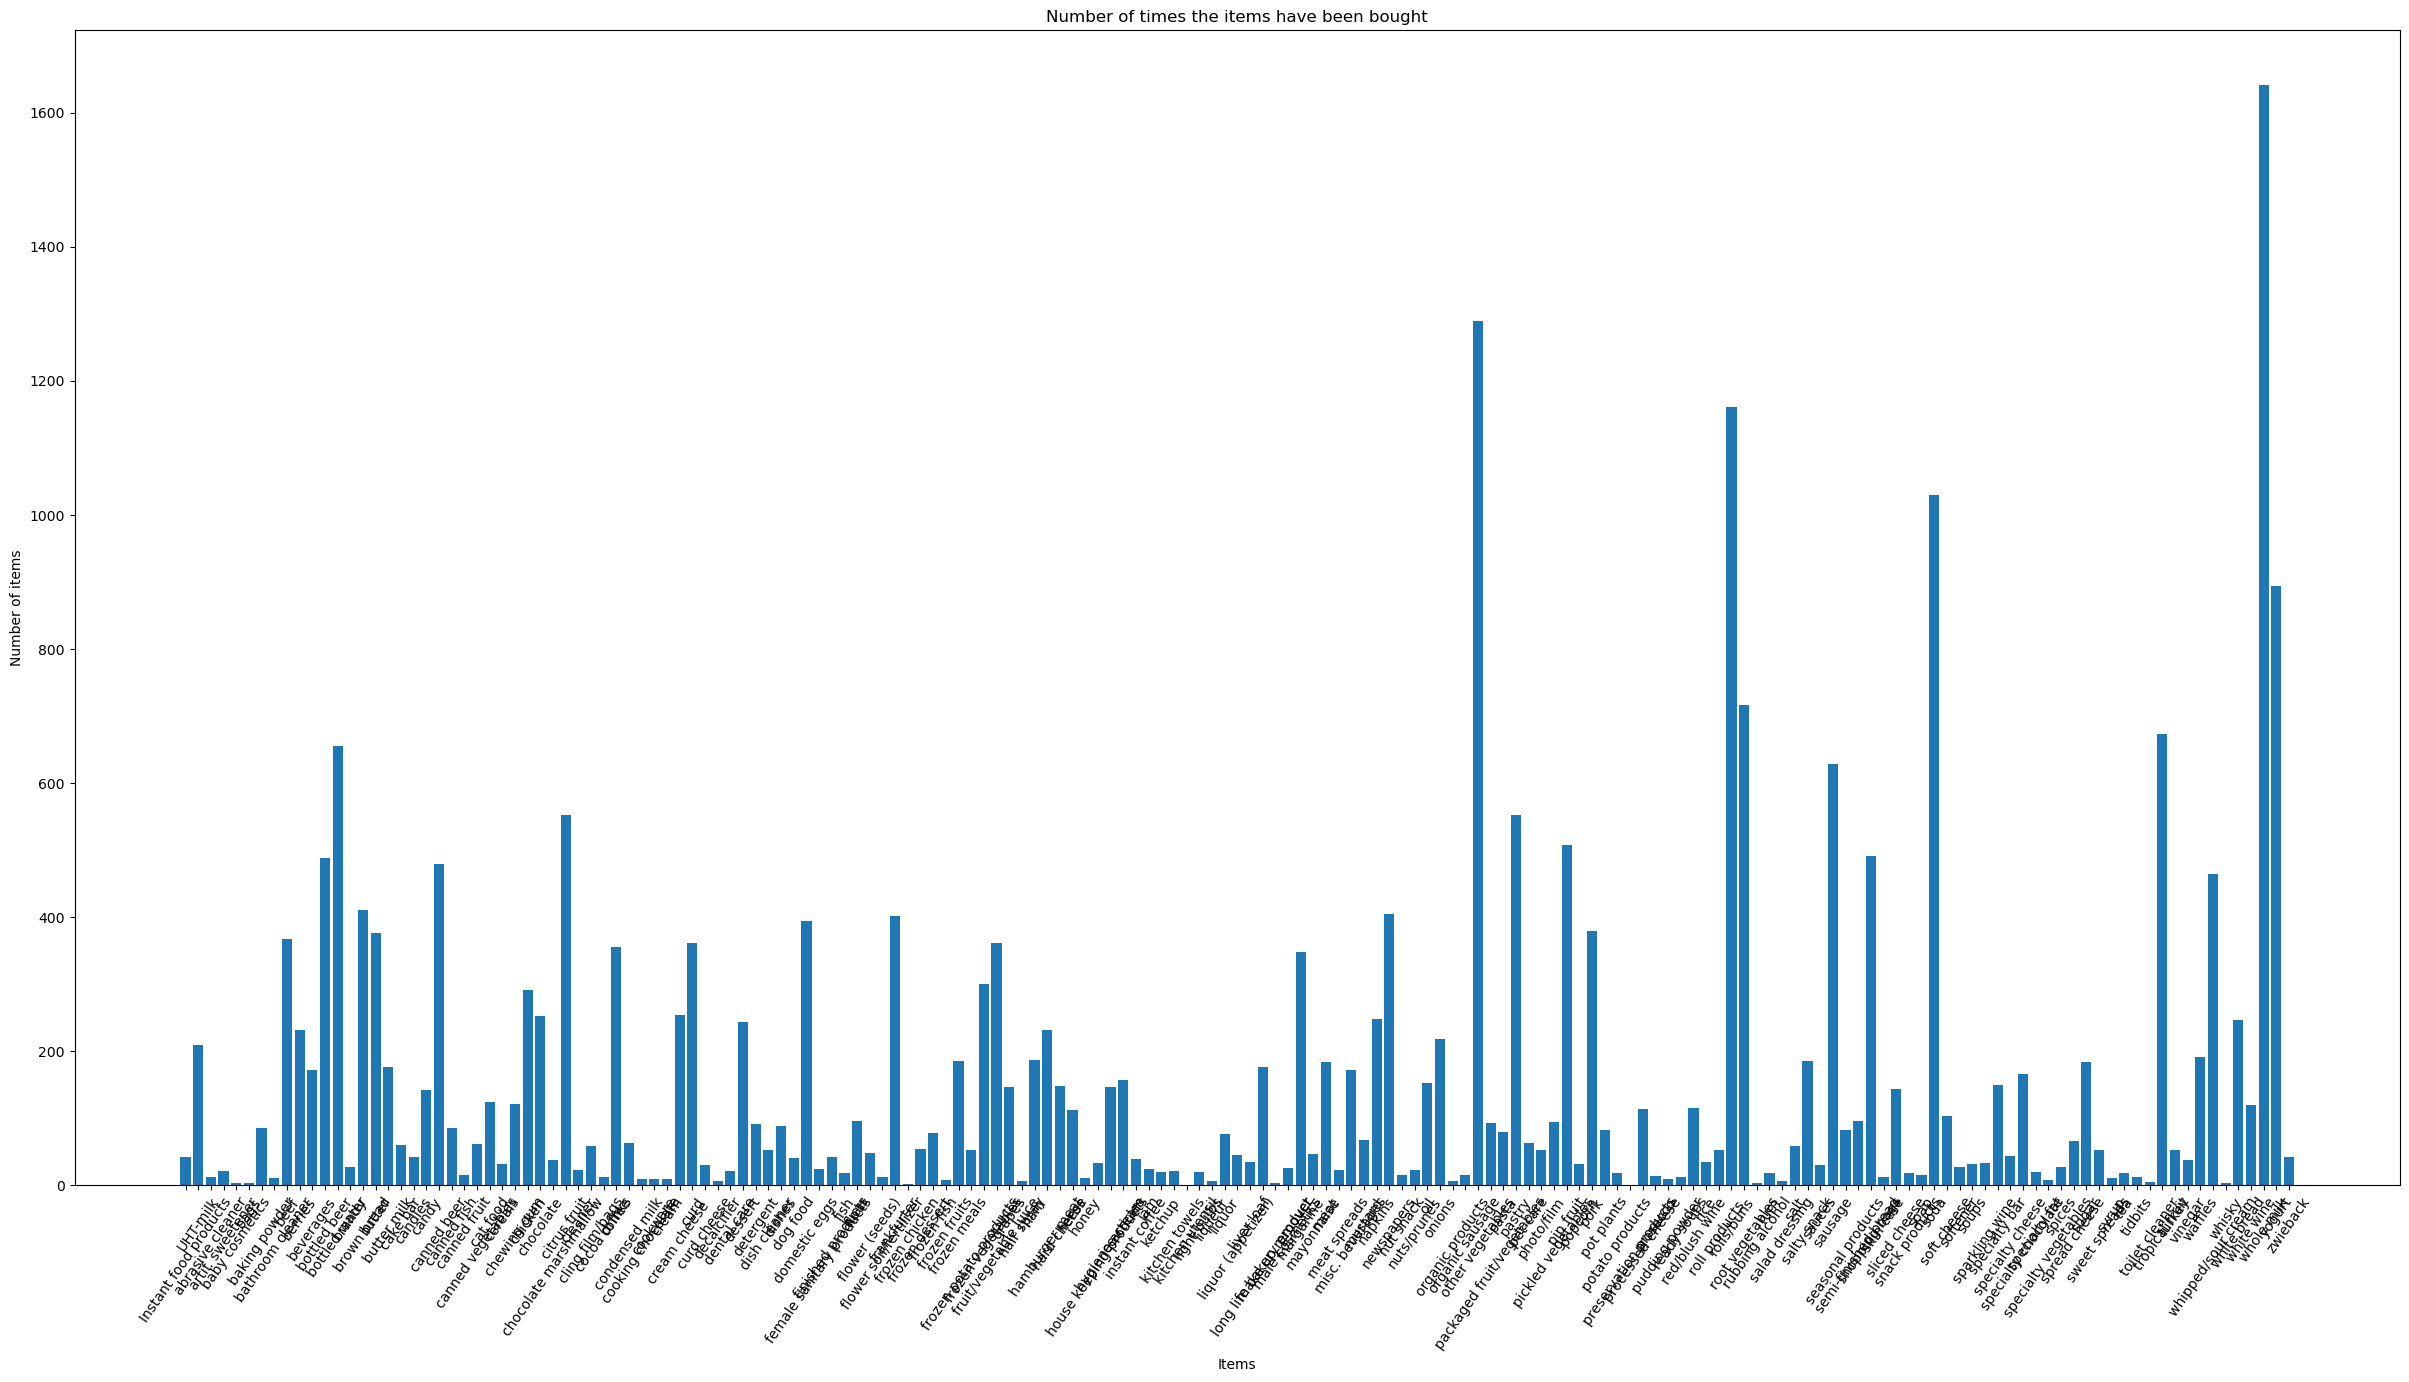

In [6]:
plt.figure(figsize = (30, 15))

prod = dict(df.sum()).keys()
pos = np.arange(len(prod))

plt.bar(pos, dict(df.sum()).values()) 
plt.xticks(pos, prod, rotation = 55)
plt.xlabel("Items")
plt.ylabel("Number of items")
plt.title("Number of times the items have been bought")
plt.show()


In [7]:
groupTrainDataCF = trainData.groupby(["Member_number"])["itemDescription"].apply(list)
groupTrainDataCF
#Creating new Dataframe on the data based on frequency (count)
ratingsDF = pd.DataFrame(columns=["user", "product", "rating"])

for i in groupTrainDataCF.index:
    prod = groupTrainDataCF[i]
    for p in set(prod):
        ratingsDF.loc[len(ratingsDF)] = [i, p, prod.count(p)]

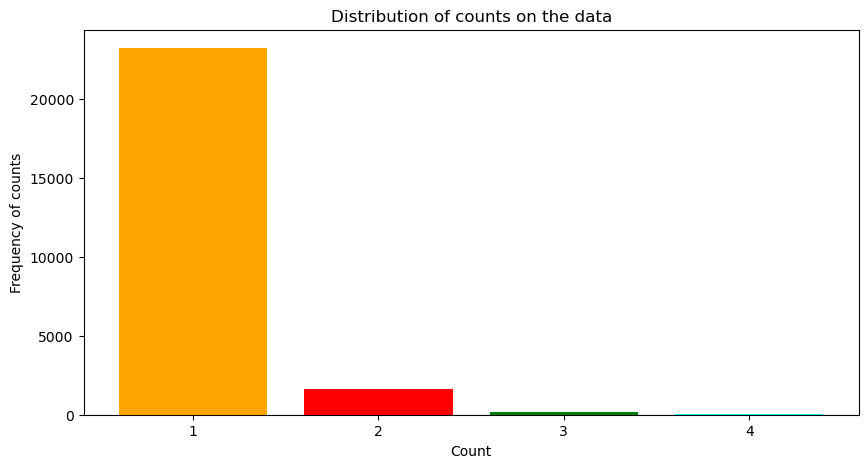

In [8]:
ratingsDict = dict(ratingsDF['rating'].value_counts())

count = ratingsDict.values()
rat = ratingsDict.keys()
pos = np.arange(len(rat))

plt.figure(figsize = (10, 5))
plt.bar(pos, count, color=['orange', 'red', 'green', 'cyan'])

plt.xticks(pos, rat, rotation=0)
plt.xlabel("Count")
plt.ylabel("Frequency of counts")
plt.title("Distribution of counts on the data")
plt.show()

In [9]:
groupTrainDataDF = groupTrainData.reset_index(name="transactions")
groupTrainDataDF['Date'] = groupTrainDataDF['Date'].astype('datetime64[D]')
groupTrainDataDF['Month'] = groupTrainDataDF['Date'].dt.month
print(groupTrainDataDF)

       Member_number       Date                       transactions  Month
0               1000 2015-03-15                  [sausage, yogurt]      3
1               1000 2014-06-24                           [pastry]      6
2               1000 2015-07-24     [misc. beverages, canned beer]      7
3               1000 2015-11-25                          [sausage]     11
4               1000 2015-05-27         [soda, pickled vegetables]      5
...              ...        ...                                ...    ...
13896           4999 2015-12-26             [herbs, bottled water]     12
13897           4999 2014-04-09  [newspapers, semi-finished bread]      4
13898           5000 2014-11-16                 [other vegetables]     11
13899           5000 2015-02-10                             [soda]      2
13900           5000 2014-03-09    [onions, fruit/vegetable juice]      3

[13901 rows x 4 columns]


{1: 1192, 2: 1068, 3: 1114, 4: 1158, 5: 1249, 6: 1171, 7: 1166, 8: 1242, 9: 1108, 10: 1178, 11: 1159, 12: 1096}


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_18524\2585423699.py:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(pos, count, color = 'bckgmrybckgm')


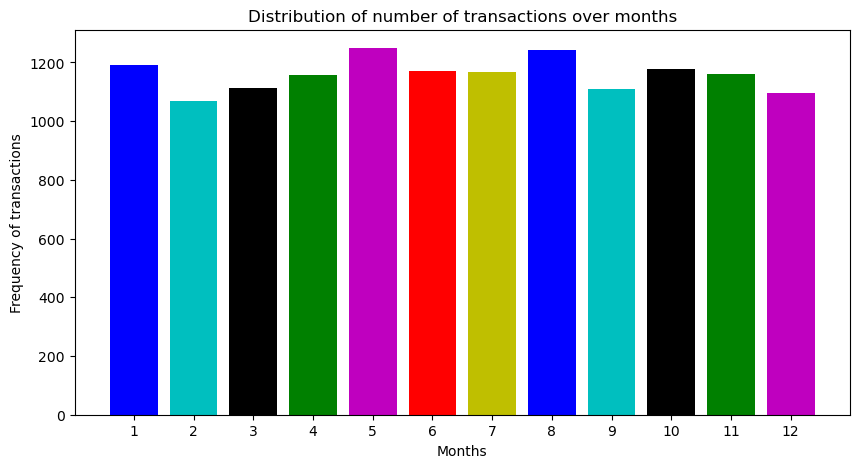

In [10]:
monthlyTransactions = dict(groupTrainDataDF.groupby(["Month"])["transactions"].count())
print(monthlyTransactions)

count = monthlyTransactions.values()
month = monthlyTransactions.keys()
pos = np.arange(len(month))

plt.figure(figsize = (10, 5))
plt.bar(pos, count, color = 'bckgmrybckgm')

plt.xticks(pos, month, rotation=0)
plt.xlabel("Months")
plt.ylabel("Frequency of transactions")
plt.title("Distribution of number of transactions over months")
plt.show()

## Task 1 - Finding Patterns and Association Rules

In [11]:
#Opening, Reading dataset

trainData = pd.read_csv("Groceries data train.csv")
trainData

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,3021,30/01/2015,frankfurter,2015,1,30,4
1,1292,24/10/2015,pork,2015,10,24,5
2,4206,4/04/2014,root vegetables,2014,4,4,4
3,4369,25/08/2015,onions,2015,8,25,1
4,1522,1/07/2014,waffles,2014,7,1,1
...,...,...,...,...,...,...,...
26995,4206,14/01/2014,rolls/buns,2014,1,14,1
26996,1660,15/06/2014,domestic eggs,2014,6,15,6
26997,1595,10/05/2015,liver loaf,2015,5,10,6
26998,3231,31/03/2015,sausage,2015,3,31,1


In [12]:
#Dataset description
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    27000 non-null  int64 
 1   Date             27000 non-null  object
 2   itemDescription  27000 non-null  object
 3   year             27000 non-null  int64 
 4   month            27000 non-null  int64 
 5   day              27000 non-null  int64 
 6   day_of_week      27000 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.4+ MB


In [13]:
#Grouping the data by Date
groupTrainData = trainData.groupby(["Member_number", "Date"])["itemDescription"].apply(list)
groupTrainData

Member_number  Date      
1000           15/03/2015                    [sausage, yogurt]
               24/06/2014                             [pastry]
               24/07/2015       [misc. beverages, canned beer]
               25/11/2015                            [sausage]
               27/05/2015           [soda, pickled vegetables]
                                           ...                
4999           26/12/2015               [herbs, bottled water]
               4/09/2014     [newspapers, semi-finished bread]
5000           16/11/2014                   [other vegetables]
               2/10/2015                                [soda]
               3/09/2014       [onions, fruit/vegetable juice]
Name: itemDescription, Length: 13901, dtype: object

In [14]:
#Finding all of the items
trainData["itemDescription"].unique()

array(['frankfurter', 'pork', 'root vegetables', 'onions', 'waffles',
       'cereals', 'yogurt', 'sausage', 'rolls/buns', 'chocolate',
       'whipped/sour cream', 'butter', 'curd', 'frozen meals',
       'whole milk', 'tropical fruit', 'sugar', 'specialty cheese',
       'other vegetables', 'fruit/vegetable juice', 'misc. beverages',
       'frozen vegetables', 'spices', 'coffee', 'cream cheese ',
       'red/blush wine', 'dessert', 'long life bakery product',
       'domestic eggs', 'abrasive cleaner', 'berries',
       'liquor (appetizer)', 'semi-finished bread', 'newspapers',
       'beverages', 'beef', 'female sanitary products', 'salt', 'soda',
       'sauces', 'oil', 'snack products', 'brown bread',
       'hygiene articles', 'artif. sweetener', 'bottled beer',
       'canned beer', 'hamburger meat', 'liver loaf', 'soups',
       'pip fruit', 'hard cheese', 'shopping bags', 'canned vegetables',
       'napkins', 'citrus fruit', 'margarine', 'pasta', 'salty snack',
       'candl

# FP

In [15]:
groupTrainData.fillna(0,inplace=True)
transactions = list(groupTrainData.values)


#Transform and prepare data using the external libraries for fpgrowth 
cols = []
for i in transactions:
    for item in i:
        if item not in cols:
            cols.append(item)
cols = sorted(cols)
df = pd.DataFrame(False, columns= cols, index = range(len(transactions)))

for ind in range(len(transactions)):
    for item in transactions[ind]:
        df.loc[ind, item] = True

In [16]:
df

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13896,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13897,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
dict(df.sum())

{'Instant food products': 42,
 'UHT-milk': 209,
 'abrasive cleaner': 12,
 'artif. sweetener': 21,
 'baby cosmetics': 3,
 'bags': 3,
 'baking powder': 86,
 'bathroom cleaner': 11,
 'beef': 367,
 'berries': 231,
 'beverages': 172,
 'bottled beer': 488,
 'bottled water': 655,
 'brandy': 27,
 'brown bread': 411,
 'butter': 377,
 'butter milk': 176,
 'cake bar': 60,
 'candles': 42,
 'candy': 142,
 'canned beer': 480,
 'canned fish': 86,
 'canned fruit': 16,
 'canned vegetables': 62,
 'cat food': 124,
 'cereals': 32,
 'chewing gum': 121,
 'chicken': 291,
 'chocolate': 252,
 'chocolate marshmallow': 38,
 'citrus fruit': 553,
 'cleaner': 23,
 'cling film/bags': 58,
 'cocoa drinks': 13,
 'coffee': 356,
 'condensed milk': 63,
 'cooking chocolate': 10,
 'cookware': 10,
 'cream': 9,
 'cream cheese ': 254,
 'curd': 362,
 'curd cheese': 31,
 'decalcifier': 6,
 'dental care': 22,
 'dessert': 244,
 'detergent': 92,
 'dish cleaner': 53,
 'dishes': 88,
 'dog food': 40,
 'domestic eggs': 394,
 'female sa

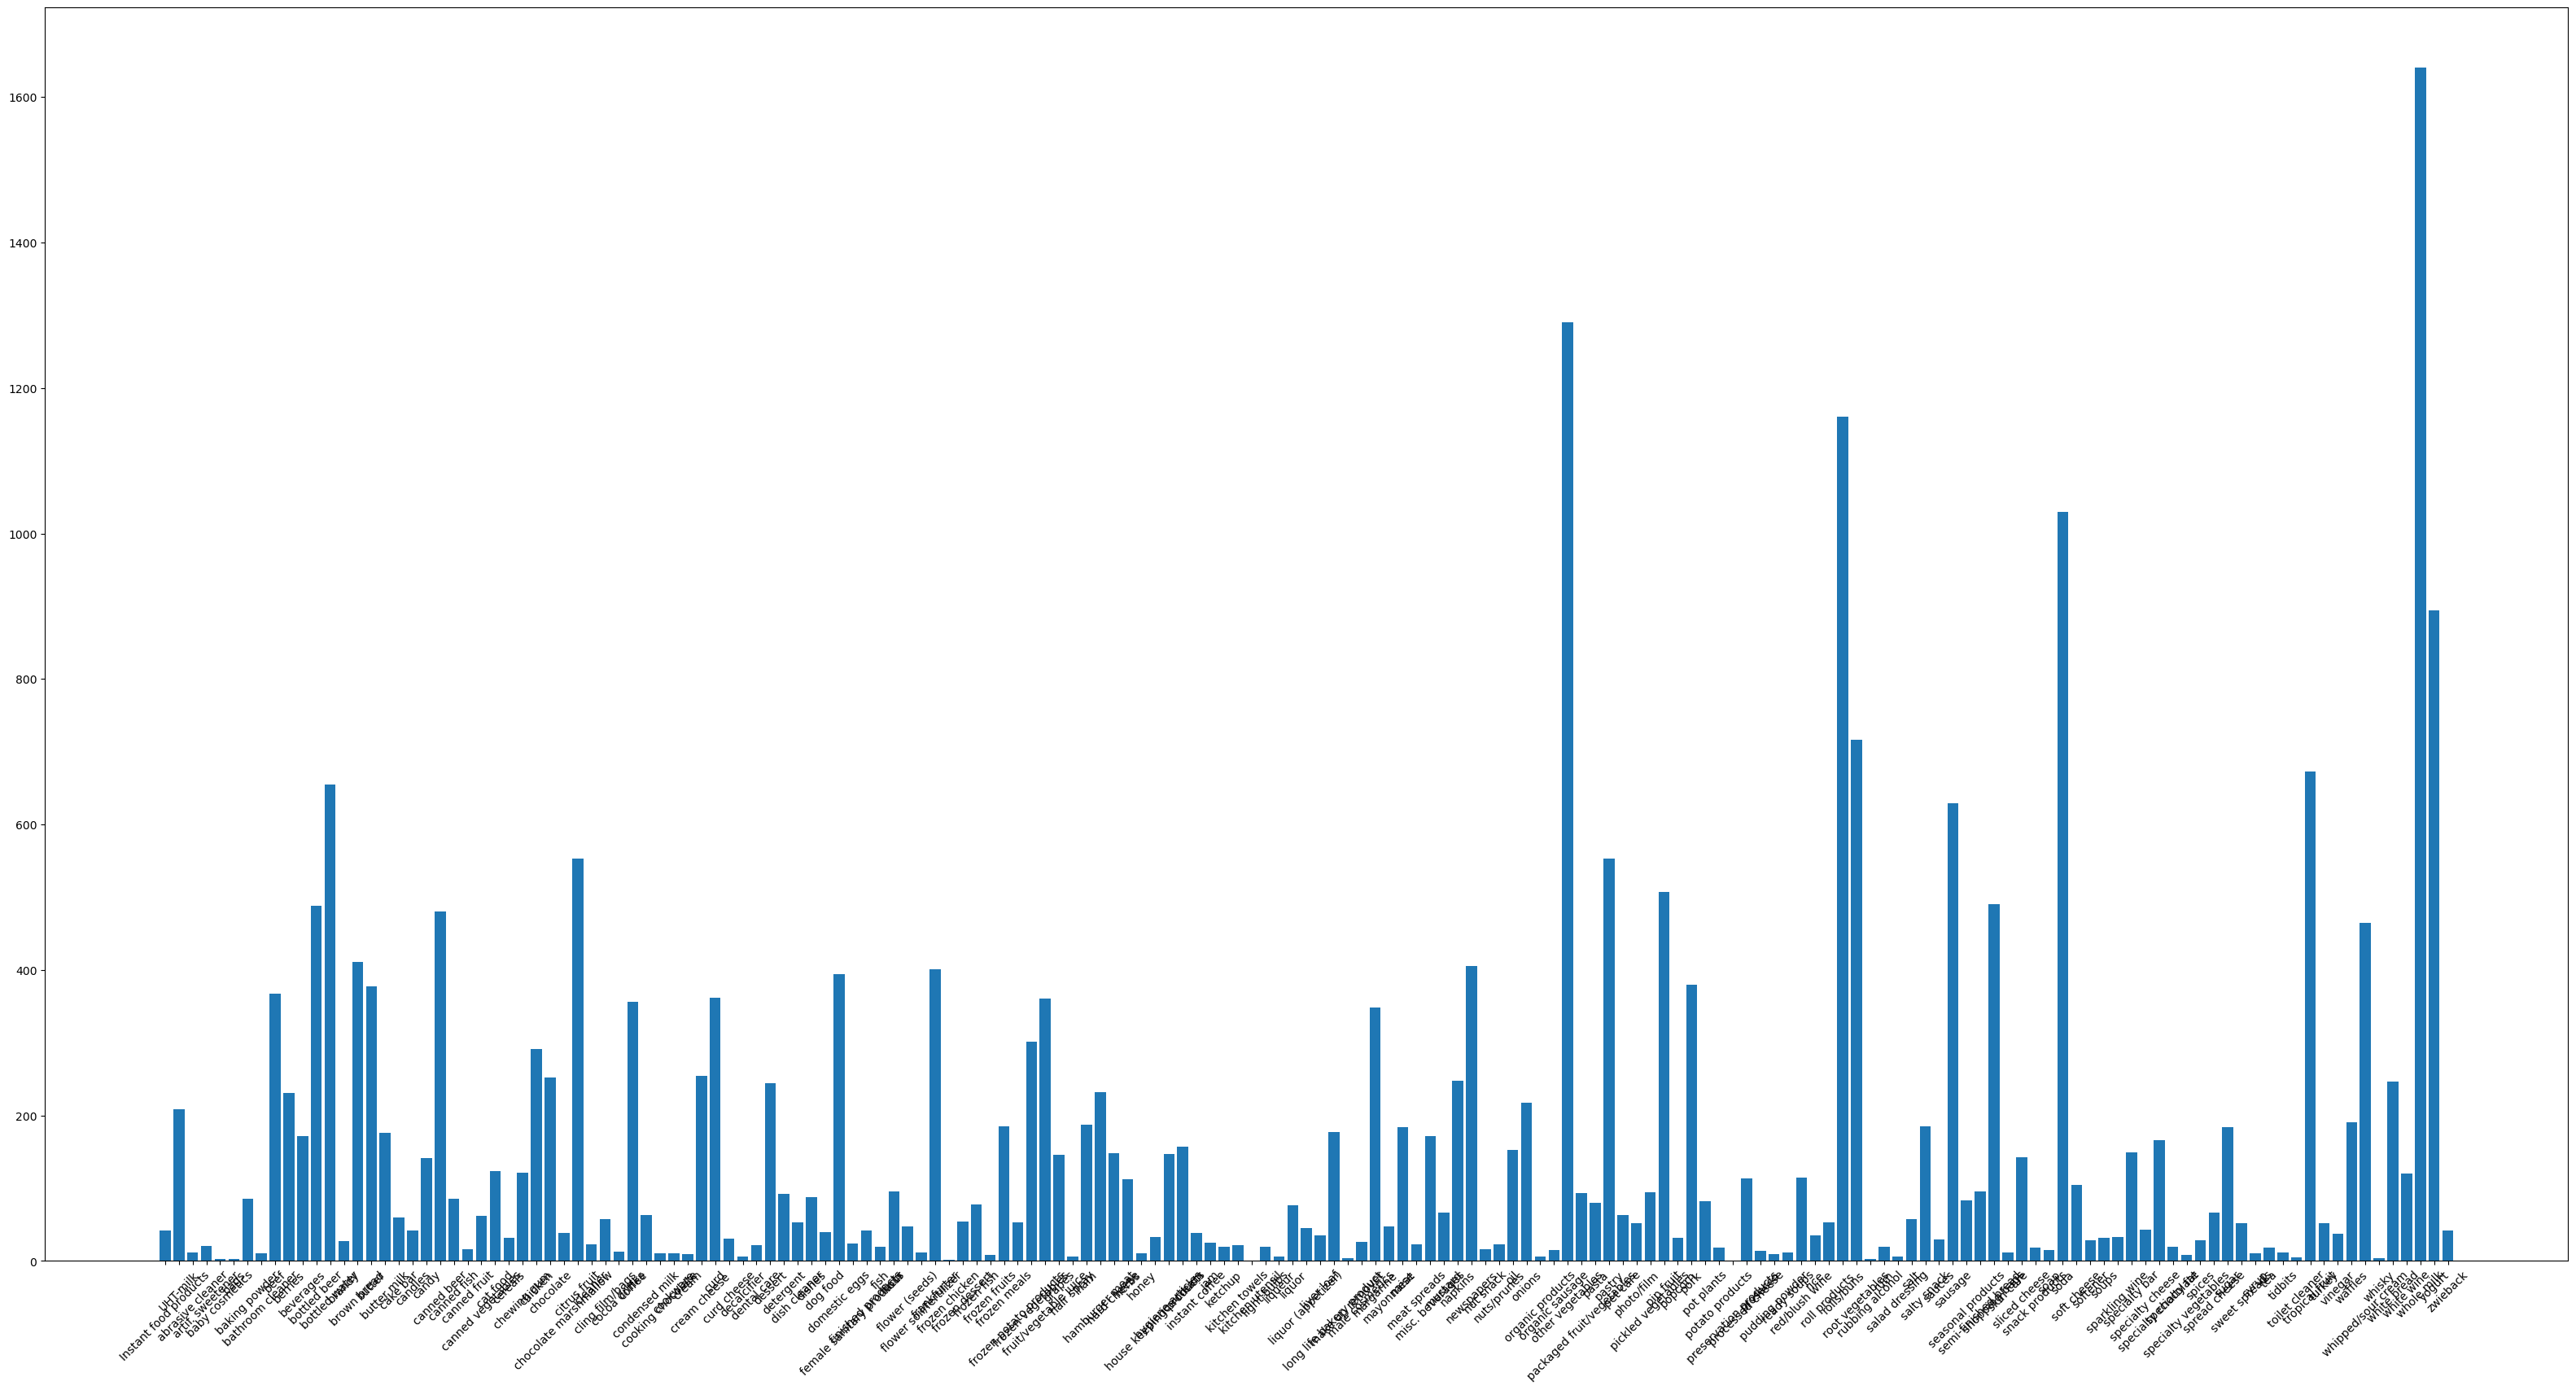

In [18]:
plt.figure(figsize=(40, 20))
plt.bar(dict(df.sum()).keys(), dict(df.sum()).values()) 
plt.xticks(rotation=45)
plt.show()


In [19]:
#Using Fp growth to find patterns
frequent_itemsets = fpgrowth(df, min_support=0.001, use_colnames=True)
frequent_itemsets

from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(whole milk),0.064312,0.118049,0.006546,0.101790,0.862266,-0.001046,0.981898,-0.145820
1,(sausage),(whole milk),0.045249,0.118049,0.005251,0.116057,0.983127,-0.000090,0.997747,-0.017658
2,(white bread),(whole milk),0.017769,0.118049,0.001870,0.105263,0.891690,-0.000227,0.985710,-0.110054
3,(frankfurter),(whole milk),0.028847,0.118049,0.003237,0.112219,0.950617,-0.000168,0.993434,-0.050775
4,(frankfurter),(other vegetables),0.028847,0.092799,0.003093,0.107232,1.155528,0.000416,1.016166,0.138593
5,(butter),(whole milk),0.027120,0.118049,0.002806,0.103448,0.876316,-0.000396,0.983715,-0.126695
6,(shopping bags),(whole milk),0.035321,0.118049,0.003597,0.101833,0.862633,-0.000573,0.981945,-0.141684
7,(bottled beer),(whole milk),0.035105,0.118049,0.003741,0.106557,0.902653,-0.000403,0.987138,-0.100532
8,(domestic eggs),(whole milk),0.028343,0.118049,0.003093,0.109137,0.924506,-0.000253,0.989996,-0.077526
9,(herbs),(whole milk),0.008057,0.118049,0.001007,0.125000,1.058882,0.000056,1.007944,0.056059


In [20]:
print(type(rules))

<class 'pandas.core.frame.DataFrame'>


In [21]:
#Function to use Fp growth and to output a dataframe


def Fp_growthDF(min_supp_train = 0.001, min_conf_train = 0.1, min_supp_test = 0.001, min_conf_test = 0.01):
    trainData = pd.read_csv("Groceries data train.csv")
    testData = pd.read_csv("Groceries data test.csv")
    groupTestData=testData.groupby(["Member_number", "Date"])["itemDescription"].apply(list)
    groupTestDataCF = testData.groupby(["Member_number"])["itemDescription"].apply(list)
    ratingsTestDF = pd.DataFrame(columns=["user", "product", "rating"])
    groupTrainData = trainData.groupby(["Member_number", "Date"])["itemDescription"].apply(list)
    groupTrainDataCF = trainData.groupby(["Member_number"])["itemDescription"].apply(list)
    ratingsDF = pd.DataFrame(columns=["user", "product", "rating"])
    for i in groupTrainDataCF.index:
        prod = groupTrainDataCF[i]
        for p in set(prod):
            ratingsDF.loc[len(ratingsDF)] = [i, p, prod.count(p)]
    for i in groupTestDataCF.index:
        prodT = groupTestDataCF[i]
        for p in set(prodT):
            ratingsTestDF.loc[len(ratingsDF)] = [i, p, prodT.count(p)]

    transactions = list(groupTrainData.values)
    transactionsTest = list(groupTestData.values)
    #Transform and prepare data using the external libraries for fpgrowth 
    colsTest=[]
    for i in transactionsTest:
        for item in i:
            if item not in colsTest:
                colsTest.append(item)
    colsTest=sorted(colsTest)           
    cols = []
    for i in transactions:
        for item in i:
            if item not in cols:
                cols.append(item)
    cols = sorted(cols)
    df = pd.DataFrame(False, columns= cols, index = range(len(transactions)))
    dfTest = pd.DataFrame(False, columns= colsTest, index = range(len(transactionsTest)))
    for ind in range(len(transactions)):
        for item in transactions[ind]:
            df.loc[ind, item] = True
    for ind in range(len(transactionsTest)):
        for item in transactionsTest[ind]:
            dfTest.loc[ind, item] = True
    frequent_itemsets = fpgrowth(df, min_support=min_supp_train, use_colnames=True)
    frequent_itemsetsTest = fpgrowth(dfTest, min_support=min_supp_test, use_colnames=True)
    frequent_itemsets
    from mlxtend.frequent_patterns import association_rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_conf_train)
    rulesTest = association_rules(frequent_itemsetsTest, metric="confidence", min_threshold=min_conf_test)
    return rules,rulesTest,frequent_itemsets,frequent_itemsetsTest

In [35]:
FP_dataframe, FP_dataframe_test, FreqItemsets_train, FreqItemsets_test = Fp_growthDF()

In [36]:
FP_dataframe

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(whole milk),0.064312,0.118049,0.006546,0.101790,0.862266,-0.001046,0.981898,-0.145820
1,(sausage),(whole milk),0.045249,0.118049,0.005251,0.116057,0.983127,-0.000090,0.997747,-0.017658
2,(white bread),(whole milk),0.017769,0.118049,0.001870,0.105263,0.891690,-0.000227,0.985710,-0.110054
3,(frankfurter),(whole milk),0.028847,0.118049,0.003237,0.112219,0.950617,-0.000168,0.993434,-0.050775
4,(frankfurter),(other vegetables),0.028847,0.092799,0.003093,0.107232,1.155528,0.000416,1.016166,0.138593
5,(butter),(whole milk),0.027120,0.118049,0.002806,0.103448,0.876316,-0.000396,0.983715,-0.126695
6,(shopping bags),(whole milk),0.035321,0.118049,0.003597,0.101833,0.862633,-0.000573,0.981945,-0.141684
7,(bottled beer),(whole milk),0.035105,0.118049,0.003741,0.106557,0.902653,-0.000403,0.987138,-0.100532
8,(domestic eggs),(whole milk),0.028343,0.118049,0.003093,0.109137,0.924506,-0.000253,0.989996,-0.077526
9,(herbs),(whole milk),0.008057,0.118049,0.001007,0.125000,1.058882,0.000056,1.007944,0.056059


## Task2 (Finding recommendtions based on data using collaborative filtering)

### Importing data and pre processing

In [24]:
# function to import data to return training data
def import_data():
    # reading the training csv file
    trainData = pd.read_csv("Groceries data train.csv")
    return trainData

In [25]:
# function to prepare data
def prepare_data(trainData):
    # getting transaction wise data 
    transactionData = trainData.groupby(["Member_number", "Date"])["itemDescription"].apply(list)

    # getting user wise data from full transactions so that we will know what all user has bought
    userWiseTransactionsData = trainData.groupby(["Member_number"])["itemDescription"].apply(list)
    userWiseTransactionsData
    
    # creating a utility matrix of user across items with values as the count of the number of times user has bought that product
    utilityMatrix = pd.DataFrame(0, index = sorted(trainData["Member_number"].unique()), columns = sorted(trainData["itemDescription"].unique()))
    
    for i in userWiseTransactionsData.index:
        items = userWiseTransactionsData[i]
        for item in set(items):
            utilityMatrix.loc[i, item] = items.count(item)


    #print("utility matrix: \n", utilityMatrix)
    return utilityMatrix, userWiseTransactionsData

#### here we hve condidered count of the number of times user has bought that particulr product as our rating. We could have also done binary matrix like if person has bought or no but here the count can give certain weight to the product because user will buy multiple times if he likes the product so we have used count

In [26]:
# function to preprocess the data
def pre_process_data(utilityMatrix):
    # getting list of all users
    users = list(utilityMatrix.index)
    # getting list of all items
    items = list(utilityMatrix.columns)

    utilityMatrixVal = utilityMatrix.values

    # getting the column wise sum i.e. of items
    itemRatingsSum = np.sum(utilityMatrixVal, axis = 0)

    # getting the count where the rting for that product is ctually present i.e. not 0
    itemRatingsCount = np.sum(utilityMatrixVal.astype(bool), axis = 0) + 1

    #calculating columnwise mean for each product
    itemMeans = np.round(itemRatingsSum / itemRatingsCount, 4)
    #print("item Means: \n", itemMeans)

    # replcing all the zeroes with the respective product means
    missingUtilityMatrix = np.round(np.multiply(~utilityMatrixVal.astype(bool), itemMeans), 4)
    #print("imputed with item means utility matrix : \n", missingUtilityMatrix)

    # final imputed matrix 
    imputedUtilityMatrix = utilityMatrixVal + missingUtilityMatrix

    # calculting userwise means
    userMeans = np.round(np.mean(utilityMatrixVal, axis = 1).reshape(imputedUtilityMatrix.shape[0], 1), 4)
    #print("user Mens: \n", userMeans)

    # substracting user means from ech cell to center the data
    finalUtilityMatrix = utilityMatrixVal - userMeans
    #print("updated utility matrix: \n", finalUtilityMatrix)

    return users, items, userMeans, finalUtilityMatrix

#### We have replaced all the zero vlues with the respectie product means because zero would mean the user dislikes the product which may not be the case.
#### We have also substrcted user mens so that our data is centered and it is comparable with all

### defining Matrix Factoristion algorithms and fitting on data

In [27]:
# function for U V decomposition (workshop code)
# [1]
def uv_decomposition(R, k, learning_rate, regularization):
    """
    Performs UV decomposition on the input matrix R, with a target rank of k, using stochastic gradient descent (SGD).
    Returns the decomposed matrices U and V.
    """
    # Initialize U and V with random values
    num_users, num_items = R.shape
    U = np.random.rand(num_users, k)
    V = np.random.rand(k, num_items)

    # Perform stochastic gradient descent to optimize U and V
    for epoch in range(10):
        for i in range(num_users):
            for j in range(num_items):
                if R[i, j] > 0:
                    error = R[i, j] - np.dot(U[i, :], V[:, j])
                    U[i, :] += learning_rate * (error * V[:, j] - regularization * U[i, :])
                    V[:, j] += learning_rate * (error * U[i, :] - regularization * V[:, j])

    # Return the decomposed matrices U and V
    return U, V


In [28]:
# function to fit the final matrix
def fit(finalUtilityMatrix, userMeans):
    # Performing UV decomposition on the final utility matrix
    U, V = uv_decomposition(finalUtilityMatrix, k = 5, learning_rate = 0.1, regularization = 0.1)

    # Reconstruct the final utility matrix using the decomposed matrices U and V
    utilityMatrix_reconstructed = np.dot(U, V)

    # Print the original final utility matrix and the reconstructed utility matrix
    #print("Original final utility matrix:")
    #print(finalUtilityMatrix)
    #print("Reconstructed utility matrix:")
    #print(utilityMatrix_reconstructed)

    # we are adding the respective user means so that we get the rating in the same original sacle
    estimtedRatings = utilityMatrix_reconstructed + userMeans
    print("Estimated ratings: ", estimtedRatings)

    return estimtedRatings

### Getting the output

In [29]:
# function to get top 10 recommendtions
def get_recommendation(userWiseTransactionsData, users, items, estimtedRatings):
    testSet = []
    # constructing the test set such that we have ll unused products for ech user
    for u in userWiseTransactionsData.index:
        remaining = [item for item in items if item not in set(userWiseTransactionsData[u])]
        testSet.extend([(u, item) for item in remaining])
    
    # initialising recommendations dictionary
    recommendations = defaultdict(defaultdict)

    for u, i in testSet:
        recommendations[u][i] = estimtedRatings[users.index(u)][items.index(i)]

    # sorting the dictionry for each user nd selecting top 10
    for user in recommendations.keys():
        sortedUser = dict(sorted(recommendations[user].items(), key=lambda x: x[1], reverse = True))
        recommendations[user] = {item : sortedUser[item] for item in list(sortedUser)[ :10]}

    return recommendations

### model evalution

In [30]:
# function for evaluation of the result
def evalution(userWiseTransactionsData, recommendations, patterns = False):
    # reading the test data
    testData = pd.read_csv("Groceries data test.csv")

    # getting userwise items bought in all transactions
    userWiseTestData = testData.groupby(["Member_number"])["itemDescription"].apply(set)

    if not patterns:
        for ind in userWiseTestData.index:
            if ind in userWiseTransactionsData.index:
                userWiseTestData[ind] = [item for item in userWiseTestData[ind] if item not in userWiseTransactionsData[ind]]
    

    # Hit rate
    hits = 0
    for ind in userWiseTestData.index:
        if ind in recommendations:
            for item in recommendations[ind]:
                if item in userWiseTestData[ind]:
                    hits = hits + 1
                    break
    # getting the number of hits for all the users and dividing by total number of users
    hitrate = hits / len(userWiseTestData)
    print("Hit rate : ", hitrate)

    # Precision
    precisions = []
    for ind in userWiseTestData.index:
        hits = 0
        flag = False
        if ind in recommendations:
            for item in recommendations[ind]:
                flag = True
                if item in userWiseTestData[ind]:
                    hits = hits + 1

        if flag:
            precisions.append(hits / len(recommendations[ind]))
    # getting number of relevant items
    precision = np.mean(precisions)
    print("precision : ", precision)

    # Recall
    recalls = []
    for ind in userWiseTestData.index:
        hits = 0
        if ind in recommendations:
            for item in recommendations[ind]:
                if item in userWiseTestData[ind]:
                    hits = hits + 1

        if len(userWiseTestData[ind]) > 0:
            recalls.append(hits / len(userWiseTestData[ind]))
    # getting number of relevant items
    recall = np.mean(recalls)
    print("recall : ", recall)

    # Precision@5
    precisionsAt5 = []
    for ind in userWiseTestData.index:
        hits = 0
        flag = False
        if ind in recommendations:
            if type(recommendations[ind]) == list:
                rec = recommendations[ind][:5]
            else:
                rec = list(recommendations[ind].keys())[:5]
        
            for item in rec:
                flag = True
                if item in userWiseTestData[ind]:
                    hits = hits + 1

        if flag:
            precisionsAt5.append(hits / len(list(recommendations[ind])[:5]))
    # getting number of relevant items
    precisionAt5 = np.mean(precisionsAt5)
    print("precision At 5 : ", precisionAt5)

    # Recall@5
    recallsAt5 = []
    for ind in userWiseTestData.index:
        hits = 0
        if ind in recommendations:
            if type(recommendations[ind]) == list:
                rec = recommendations[ind][:5]
            else:
                rec = list(recommendations[ind].keys())[:5]
        
            for item in rec:
                if item in userWiseTestData[ind]:
                    hits = hits + 1

        if len(userWiseTestData[ind]) > 0:
            recallsAt5.append(hits / len(list(userWiseTestData[ind])[:5]))
    # getting number of relevant items
    recallAt5 = np.mean(recallsAt5)
    print("recall At 5 : ", recallAt5)

### Calling all the function in this main function to get final recommendations

In [31]:
# defining the main function to call all the functions nd return recomendations
def main_cf():
    trainData = import_data()

    utilityMatrix, userWiseTransactionsData = prepare_data(trainData)

    #print(dict(utilityMatrix.sum()))

    topAvgItemRatings = sorted(np.mean(utilityMatrix.values, axis = 0), reverse = True)
    #print(topAvgItemRatings[:10])

    users, items, userMeans, finalUtilityMatrix = pre_process_data(utilityMatrix)

    estimtedRatings = fit(finalUtilityMatrix, userMeans)

    recommendations = get_recommendation(userWiseTransactionsData, users, items, estimtedRatings)

    evalution(userWiseTransactionsData, recommendations)

    # returning the final recommendtions
    return recommendations

#### so this main function can be called in out final code to get recommendations based on Collaborative filtering

In [32]:
recommendationsCollaborative = main_cf()

Estimated ratings:  [[0.9293666  0.94296472 0.89949772 ... 1.08762755 1.20957674 0.9148527 ]
 [1.01649117 1.05807072 0.99042085 ... 1.2317078  1.35876714 1.03719402]
 [0.82735637 0.84398366 0.80411363 ... 0.99178366 1.07556776 0.83439767]
 ...
 [0.80803294 0.8117832  0.75900189 ... 0.90675913 1.02969794 0.77480962]
 [0.94318823 0.97397173 0.94412781 ... 1.08720774 1.25128521 0.95363668]
 [0.78518774 0.80564105 0.81142349 ... 0.87940596 1.05747355 0.78772312]]
Hit rate :  0.47083567021873246
precision :  0.06127118644067796
recall :  0.22410725937857723
precision At 5 :  0.0707909604519774
recall At 5 :  0.13109388458225668


In [80]:
import pprint
print("member_number 4587 :", )
pprint.pprint(recommendationsCollaborative[4488])

member_number 4587 :
{'baby cosmetics': 1.103784250621202,
 'flower (seeds)': 1.1057401153813835,
 'frozen chicken': 1.1473763090383393,
 'make up remover': 1.118242491927326,
 'margarine': 1.3541731324453343,
 'other vegetables': 1.2027238769345485,
 'pip fruit': 1.161741441890793,
 'sausage': 1.243319273370895,
 'whole milk': 1.1380879423306145,
 'yogurt': 1.2291144141391475}


### TASK 3 : INTEGRATING PART1 AND PART2 

In [37]:

FP_dataframe, FP_dataframe_test, FreqItemsets_train, FreqItemsets_test = Fp_growthDF()
FP_dataframe


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(yogurt),(whole milk),0.064312,0.118049,0.006546,0.101790,0.862266,-0.001046,0.981898,-0.145820
1,(sausage),(whole milk),0.045249,0.118049,0.005251,0.116057,0.983127,-0.000090,0.997747,-0.017658
2,(white bread),(whole milk),0.017769,0.118049,0.001870,0.105263,0.891690,-0.000227,0.985710,-0.110054
3,(frankfurter),(whole milk),0.028847,0.118049,0.003237,0.112219,0.950617,-0.000168,0.993434,-0.050775
4,(frankfurter),(other vegetables),0.028847,0.092799,0.003093,0.107232,1.155528,0.000416,1.016166,0.138593
5,(butter),(whole milk),0.027120,0.118049,0.002806,0.103448,0.876316,-0.000396,0.983715,-0.126695
6,(shopping bags),(whole milk),0.035321,0.118049,0.003597,0.101833,0.862633,-0.000573,0.981945,-0.141684
7,(bottled beer),(whole milk),0.035105,0.118049,0.003741,0.106557,0.902653,-0.000403,0.987138,-0.100532
8,(domestic eggs),(whole milk),0.028343,0.118049,0.003093,0.109137,0.924506,-0.000253,0.989996,-0.077526
9,(herbs),(whole milk),0.008057,0.118049,0.001007,0.125000,1.058882,0.000056,1.007944,0.056059


antecedents: a frozenset of items that were already purchased.</br>
consequents: a frozenset of items that are likely to be purchased next.

The output is a list of tuples where each tuple contains two elements. The first element is a frozenset representing an item in the antecedents column of the DataFrame. The second element is a list of frozensets representing items in the consequents column of the DataFrame, which are associated with the antecedent item.

Each antecedent item is associated with a list of consequent items. This list represents the items that are frequently purchased together with the antecedent item. For example, the first tuple in the list shows that 'yogurt' is frequently purchased with 'rolls/buns', 'soda', and 'other vegetables'.

A frozenset is an immutable (unchangeable) set, which means that once it is created, you cannot add or remove items from it. It is similar to a set, but with the added constraint of immutability.

In [38]:
FP_dataframe.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,0.021091,0.111764,0.002295,0.111157,1.016357,-0.000111,0.999515,-0.008158
std,0.014301,0.013947,0.001487,0.011713,0.214799,0.000346,0.022195,0.159596
min,0.008057,0.074095,0.001007,0.100671,0.852791,-0.001046,0.980677,-0.148567
25%,0.010665,0.118049,0.001169,0.102457,0.871814,-0.000246,0.983132,-0.129836
50%,0.014387,0.118049,0.001726,0.106895,0.927939,-0.000164,0.990447,-0.073521
75%,0.028721,0.118049,0.003093,0.115098,1.057152,0.000065,1.007709,0.054530
max,0.064312,0.118049,0.006546,0.140351,1.680463,0.000466,1.066110,0.408274


In [39]:
FP_dataframe

# extract the 'name' column as a list
ant_list = FP_dataframe['antecedents'].tolist()
con_list = FP_dataframe['consequents'].tolist()

# print the list
print('ANTECENDANTS LIST')
print()
print(ant_list)
print()
# print the list
print('CONSEQUENT LIST')
print()
print(con_list)

ANTECENDANTS LIST

[frozenset({'yogurt'}), frozenset({'sausage'}), frozenset({'white bread'}), frozenset({'frankfurter'}), frozenset({'frankfurter'}), frozenset({'butter'}), frozenset({'shopping bags'}), frozenset({'bottled beer'}), frozenset({'domestic eggs'}), frozenset({'herbs'}), frozenset({'specialty bar'}), frozenset({'UHT-milk'}), frozenset({'grapes'}), frozenset({'grapes'}), frozenset({'candy'}), frozenset({'processed cheese'}), frozenset({'long life bakery product'}), frozenset({'cream cheese '}), frozenset({'ham'}), frozenset({'waffles'}), frozenset({'oil'}), frozenset({'hard cheese'})]

CONSEQUENT LIST

[frozenset({'whole milk'}), frozenset({'whole milk'}), frozenset({'whole milk'}), frozenset({'whole milk'}), frozenset({'other vegetables'}), frozenset({'whole milk'}), frozenset({'whole milk'}), frozenset({'whole milk'}), frozenset({'whole milk'}), frozenset({'whole milk'}), frozenset({'whole milk'}), frozenset({'whole milk'}), frozenset({'whole milk'}), frozenset({'soda'}),

In [40]:
#determine the frequency and the count of the antecendants list 

from collections import Counter

# extract the 'name' column as a list
ant_list = FP_dataframe['antecedents'].tolist()

# flatten the list of frozensets
flat_list = [item for sublist in ant_list for item in sublist]

# count the frequency of each item
item_counts = Counter(flat_list)

# print the frequency and count of each item
for item, count in item_counts.items():
    print(f"{item}: frequency={count}, count={count/len(ant_list)}")


yogurt: frequency=1, count=0.045454545454545456
sausage: frequency=1, count=0.045454545454545456
white bread: frequency=1, count=0.045454545454545456
frankfurter: frequency=2, count=0.09090909090909091
butter: frequency=1, count=0.045454545454545456
shopping bags: frequency=1, count=0.045454545454545456
bottled beer: frequency=1, count=0.045454545454545456
domestic eggs: frequency=1, count=0.045454545454545456
herbs: frequency=1, count=0.045454545454545456
specialty bar: frequency=1, count=0.045454545454545456
UHT-milk: frequency=1, count=0.045454545454545456
grapes: frequency=2, count=0.09090909090909091
candy: frequency=1, count=0.045454545454545456
processed cheese: frequency=1, count=0.045454545454545456
long life bakery product: frequency=1, count=0.045454545454545456
cream cheese : frequency=1, count=0.045454545454545456
ham: frequency=1, count=0.045454545454545456
waffles: frequency=1, count=0.045454545454545456
oil: frequency=1, count=0.045454545454545456
hard cheese: frequency

In [41]:
#determine the frequency and the count of the consequent list 

from collections import Counter

# extract the 'name' column as a list
ant_list = FP_dataframe['consequents'].tolist()

# flatten the list of frozensets
flat_list = [item for sublist in ant_list for item in sublist]

# count the frequency of each item
item_counts = Counter(flat_list)

# print the frequency and count of each item
for item, count in item_counts.items():
    print(f"{item}: frequency={count}, count={count/len(ant_list)}")


whole milk: frequency=18, count=0.8181818181818182
other vegetables: frequency=1, count=0.045454545454545456
soda: frequency=1, count=0.045454545454545456
rolls/buns: frequency=2, count=0.09090909090909091


In [42]:
# get the member_number column as a list
member_numbers = trainData['Member_number'].tolist()

# get the frequency of each member_number
member_number_freq = {}
for num in member_numbers:
    if num in member_number_freq:
        member_number_freq[num] += 1
    else:
        member_number_freq[num] = 1

# sort the member_number_freq by frequency in descending order
sorted_member_number_freq = sorted(member_number_freq.items(), key=lambda x: x[1], reverse=True)

# print the frequency and count of the top 10 member numbers
print("Top 10 Member Numbers by Frequency:")
print("Member Number\tFrequency\tCount")
for num, freq in sorted_member_number_freq[:10]:
    count = trainData[trainData['Member_number'] == num]['Member_number'].count()
    print(f"{num}\t\t{freq}\t\t{count}")


Top 10 Member Numbers by Frequency:
Member Number	Frequency	Count
3050		26		26
2625		24		24
4695		23		23
3180		23		23
3872		22		22
3737		21		21
2960		21		21
2433		21		21
1379		21		21
2851		21		21


In [43]:
import pandas as pd


# get the frequency of each member
member_freq = trainData['Member_number'].value_counts()

# get the count of each member
member_count = trainData['Member_number'].groupby(trainData['Member_number']).count()

# convert the resulting Series objects to DataFrames
member_freq_df = pd.DataFrame({'Member_number': member_freq.index, 'frequency': member_freq.values})
member_count_df = pd.DataFrame({'Member_number': member_count.index, 'count': member_count.values})

# print the resulting DataFrames
print("FREQUENCY")
print(member_freq_df)

print("\nCOUNT")
print(member_count_df)


FREQUENCY
      Member_number  frequency
0              3050         26
1              2625         24
2              4695         23
3              3180         23
4              3872         22
...             ...        ...
3867           3425          1
3868           2103          1
3869           2335          1
3870           3345          1
3871           3097          1

[3872 rows x 2 columns]

COUNT
      Member_number  count
0              1000      8
1              1001     11
2              1002      6
3              1003      5
4              1004     15
...             ...    ...
3867           4996      9
3868           4997      4
3869           4998      2
3870           4999     12
3871           5000      4

[3872 rows x 2 columns]


In [44]:
#Get the Member_number and item description from the trainData DataFrame
member_item_data = trainData[['Member_number', 'itemDescription']]
print(member_item_data)
print(type(member_item_data))

member_id=(member_item_data['Member_number'])
print(member_id) #provides a series of member number

member_id_list_unique =list(set(member_id.tolist()))
print(member_id_list_unique)

       Member_number  itemDescription
0               3021      frankfurter
1               1292             pork
2               4206  root vegetables
3               4369           onions
4               1522          waffles
...              ...              ...
26995           4206       rolls/buns
26996           1660    domestic eggs
26997           1595       liver loaf
26998           3231          sausage
26999           2550      canned beer

[27000 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
0        3021
1        1292
2        4206
3        4369
4        1522
         ... 
26995    4206
26996    1660
26997    1595
26998    3231
26999    2550
Name: Member_number, Length: 27000, dtype: int64
[1000, 1001, 1002, 1003, 1004, 1005, 1006, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 

In [45]:
#Create a recommendation function that finds the most common antecedents for a given member and returns the associated consequents
def recommend_for_member(member_id, member_item_data, antecedents_list, consequents_list):
    member_items = member_item_data[member_item_data['Member_number'] == member_id]['itemDescription'].tolist()
    
    member_item_counts = Counter(member_items)
    member_antecedent_counts = Counter([item for item in member_item_counts.keys() if item in item_counts.keys()])

    most_common_antecedents = [item[0] for item in member_antecedent_counts.most_common()]

    recommendations = []
    for antecedent, consequent in zip(antecedents_list, consequents_list):
        if set(most_common_antecedents) & set(antecedent):
            recommendations.extend(consequent)

    return list(set(recommendations))

In [46]:
member_id = 3050  # Replace with the desired member ID
recommendations = recommend_for_member(member_id, member_item_data, ant_list, con_list)
print(recommendations)


['soda', 'other vegetables', 'whole milk', 'rolls/buns']


In [47]:
#test_data
member_ids = [3050, 4206, 4369, 3231, 1292]#test data

recommendations_list = []
for member_id in member_ids:
    recommendations = recommend_for_member(member_id, trainData, ant_list, con_list)
    recommendations_list.append(recommendations)

print(recommendations_list)

[['soda', 'other vegetables', 'whole milk', 'rolls/buns'], ['rolls/buns', 'whole milk'], ['whole milk'], [], ['whole milk']]


In [48]:
def get_recommendations_for_members(member_ids, member_item_data, antecedents_list, consequents_list):
    recommendations_dict = {}
    for member_id in member_ids:
        member_items = member_item_data[member_item_data['Member_number'] == member_id]['itemDescription'].tolist()

        member_item_counts = Counter(member_items)
        member_antecedent_counts = Counter([item for item in member_item_counts.keys() if item in item_counts.keys()])

        most_common_antecedents = [item[0] for item in member_antecedent_counts.most_common()]

        recommendations = []
        for antecedent, consequent in zip(antecedents_list, consequents_list):
            if set(most_common_antecedents) & set(antecedent):
                recommendations.extend(consequent)

        recommendations_dict[member_id] = list(set(recommendations))
    
    return recommendations_dict


In [49]:
fin=get_recommendations_for_members(member_id_list_unique,member_item_data,ant_list,con_list)

fin




{1000: ['soda'],
 1001: ['soda', 'rolls/buns', 'whole milk'],
 1002: ['whole milk'],
 1003: ['rolls/buns'],
 1004: ['other vegetables', 'whole milk', 'rolls/buns'],
 1005: ['rolls/buns'],
 1006: ['rolls/buns'],
 1008: [],
 1009: [],
 1010: [],
 1011: ['other vegetables', 'whole milk', 'rolls/buns'],
 1012: ['rolls/buns', 'whole milk'],
 1013: ['other vegetables', 'whole milk'],
 1014: ['whole milk'],
 1015: ['whole milk'],
 1016: ['rolls/buns'],
 1017: ['other vegetables', 'rolls/buns'],
 1018: [],
 1019: [],
 1020: ['rolls/buns'],
 1021: ['rolls/buns'],
 1022: [],
 1023: ['rolls/buns'],
 1024: ['other vegetables'],
 1025: [],
 1026: [],
 1027: ['rolls/buns', 'whole milk'],
 1028: ['soda', 'rolls/buns'],
 1029: [],
 1031: ['other vegetables'],
 1032: ['soda', 'other vegetables'],
 1033: ['soda', 'rolls/buns'],
 1034: [],
 1035: ['rolls/buns', 'whole milk'],
 1036: [],
 1037: ['rolls/buns'],
 1038: ['other vegetables', 'whole milk'],
 1039: ['rolls/buns'],
 1040: ['rolls/buns', 'whole m

In [50]:
utilityMatrix, userWiseTransactionsData = prepare_data(trainData)
evalution(userWiseTransactionsData, fin, patterns = True)

Hit rate :  0.17498597868760515
precision :  0.15833333333333333
recall :  0.05620620032425977
precision At 5 :  0.15833333333333333
recall At 5 :  0.059618620302860345


In [51]:
#get the confidence score of the consequent and aggregate it based on the confidence score

# group the rules by consequents and sum the confidence scores
confidence_scores = FP_dataframe.groupby('consequents')['confidence'].sum()
print()


# print the confidence scores
print(confidence_scores)
print()
ri=confidence_scores.reset_index()
print(ri)

ri.columns=["item","score"]
print('-------------------------------------------------')
member_number=2011
ri["Member_number"] = member_number
print(ri)
print('-------------------------------------------------')

print('-------------------------------------------------')
member_number=2026
ri["Member_number"] = member_number
print(ri)
print('-------------------------------------------------')


print()
# convert to list
confidence_scores_list = confidence_scores.tolist()

# print the confidence scores list
print(confidence_scores_list)


consequents
(whole milk)          1.986923
(other vegetables)    0.107232
(soda)                0.109589
(rolls/buns)          0.241702
Name: confidence, dtype: float64

          consequents  confidence
0        (whole milk)    1.986923
1  (other vegetables)    0.107232
2              (soda)    0.109589
3        (rolls/buns)    0.241702
-------------------------------------------------
                 item     score  Member_number
0        (whole milk)  1.986923           2011
1  (other vegetables)  0.107232           2011
2              (soda)  0.109589           2011
3        (rolls/buns)  0.241702           2011
-------------------------------------------------
-------------------------------------------------
                 item     score  Member_number
0        (whole milk)  1.986923           2026
1  (other vegetables)  0.107232           2026
2              (soda)  0.109589           2026
3        (rolls/buns)  0.241702           2026
---------------------------------------

Reference

[1] - Workshop code